# Unit 2; Data Management

## Introduction

In [1]:
# Import pandas and numpy for later
import numpy as np
import pandas as pd

# Request plots to render inline within this notebook for reference
%matplotlib inline

Importing PyPlot

In [2]:
# Import as-is
from matplotlib import pyplot

# Import with pseudonym 'plt'
from matplotlib import pyplot as plt

## Basic Plots

In [3]:
# Saving a plot
plt.savefig('my_plot.svg')

<Figure size 432x288 with 0 Axes>

In [4]:
# Reseting the workspace
plt.close()

In [5]:
# Load the iris data we want to plot
df = pd.read_csv('iris_data.tsv', sep='\t')

Jack-of-All-Trades Scatter Plots:

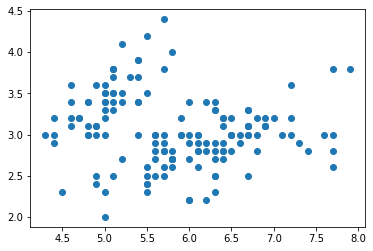

In [6]:
# Plot sepal length against sepal width
plt.scatter(
  x=df.loc[:, 'Sepal Length'], 
  y=df.loc[:, 'Sepal Width']
)
# NOTE: plt.show() only works within a notebook context by default; 
# don't expect it to work in consoles!
plt.show()
plt.close()

Shifting trends with Line-based plots

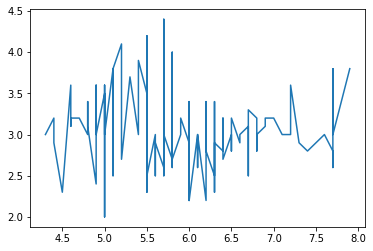

In [7]:
# Plot sepal length against width again
plt.plot(
  df.sort_values(by='Sepal Length')
    .loc[:, 'Sepal Length'], 
  df.sort_values(by='Sepal Length')
    .loc[:, 'Sepal Width']
)
plt.show()
plt.close()

Comparisons with Bar Plots

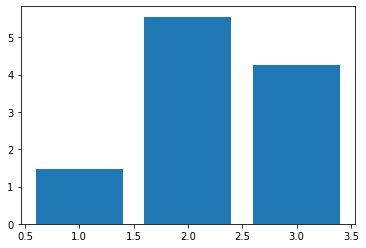

In [8]:
# Compare mean petal lengths across species
plt.bar(
  # We have 3 species, thus we want 3 positions
  x=[1, 2, 3],
  # The mean length for each species, using ‘groupby’ 
  height=df.groupby("Species")
    .apply(np.mean).loc[:, "Petal Length"]
)

plt.show()
plt.close()

Distributions with Histograms

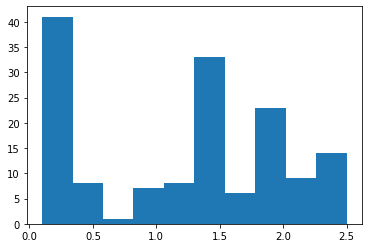

In [9]:
# Plot the distribution of Petal Width in 10 bins
plt.hist(
  x=df.loc[:, "Petal Width"],
  bins=10
)

plt.show()
plt.close()

## Adding in Details

Axes Labels and Titles

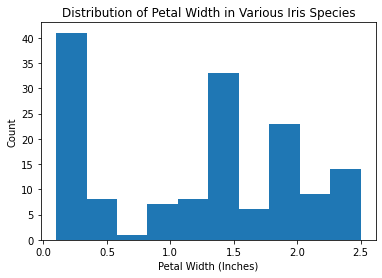

In [10]:
# Plot the histogram prior with axes labels
plt.hist(
  x=df.loc[:, "Petal Width"],
  bins=10
) # Same as before
plt.xlabel("Petal Width (Inches)")
plt.ylabel("Count")
plt.title("Distribution of Petal Width in Various Iris Species")

plt.show()
plt.close()

Colouration

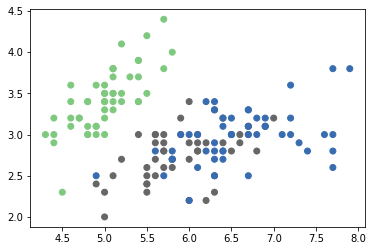

In [11]:
# A function to map species to a number
def color_species(val):
  if val == "Setosa":
    return 0
  elif val == "Verginica":
    return 1 
  elif val == "Versicolour":
    return 2
  return -1
# Build a colour column using the prior function
colour_vals = df.loc[:, "Species"].apply(color_species)
# Plot the data, building on the prior scatter function
plt.scatter(
    x=df.loc[:, 'Sepal Length'], 
    y=df.loc[:, 'Sepal Width'], 
    c=colour_vals, cmap="Accent"
)

plt.show()
plt.close()

Element sizes

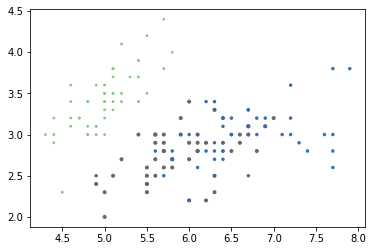

In [12]:
# A function to map species to a number
def size_species(val):
  if val == "Setosa":
    return 3
  elif val == "Verginica":
    return 6 
  elif val == "Versicolour":
    return 9
  return 0
# Build a size list using the prior function
size_vals = df.loc[:, "Species"].apply(size_species)

# Plot the data, building on the prior scatter function
plt.scatter(
    x=df.loc[:, 'Sepal Length'], 
    y=df.loc[:, 'Sepal Width'], 
    c=colour_vals, cmap="Accent",
    s=size_vals
)

plt.show()
plt.close()

Marker Styles

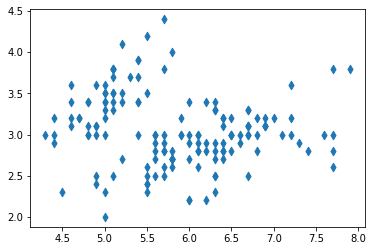

In [13]:
plt.scatter(
    x=df.loc[:, 'Sepal Length'], 
    y=df.loc[:, 'Sepal Width'],
    marker='d'
)

plt.show()
plt.close()

Simmultaneous Plots

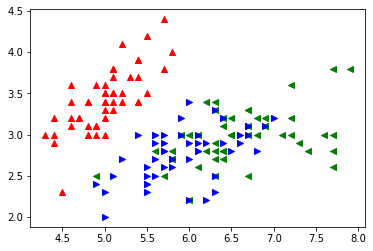

In [14]:
# Specify the variants we need to iterate through
species = ['Setosa', 'Verginica', 'Versicolour']
colours = ['red', 'green', 'blue']
symbols = ['^', '<', '>']
# Plot each species one by one using the variants above
for i in range(3):
    # Isolate the data for our species of interest
    sub_df = df[df.loc[:, "Species"] == species[i]]
    # Plot the data
    plt.scatter(
      x=sub_df.loc[:, "Sepal Length"], 
      y=sub_df.loc[:, "Sepal Width"], 
      c=colours[i], marker=symbols[i]
    )
    
plt.show()
plt.close()

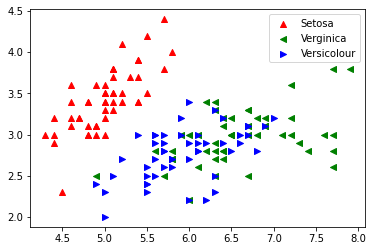

In [15]:
# Specify the variants we need to iterate through
species = ['Setosa', 'Verginica', 'Versicolour']
colours = ['red', 'green', 'blue']
symbols = ['^', '<', '>']
# Extending the prior code with a legend:
for i in range(3):
    sub_df = df[df.loc[:, "Species"] == species[i]]
    plt.scatter(
        x=sub_df.loc[:, "Sepal Length"], 
        y=sub_df.loc[:, "Sepal Width"], 
        c=colours[i], marker=symbols[i],
        label=species[i]
    )
    
plt.legend()

plt.show()
plt.close()